# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Summary
* Regardless of hemishpere there seems to be little correlation between latitude and wind speed. Both hemispheres hover between 5 and 10 mph with wind speed decreasing slightly as you approach the equator. I would predict that there are environmental factors that play a much larger part in determining wind speed, such as structures, altitude, and proximity to bodies of water. Further studies could be done to show connctions between these factors and wind. 
* Like wind speeds, hemispheres and latitude has little to do with cloudiness. The r-squared values are under .1 for both hemispheres displayed and the data displayed through scatter plots shows a large variance in cloudiness across the plot. I would imagine that another sample of cities would show the same spread of data. 
* As expected, as you approach the equator temperature rises. This shown for both the southern and northern hemisphere as approximately the same rate. Any variance in rising temperature as you approach the equator can most likely be accounted for from the sample of cities taken. 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold response info
lat = []
lng = []
temp = []
humidity = []
cloud = []
wind = []
locations = []
max_temp = []

#Print log should look like:
print("Beginning Data Retrieval")
print("-------------------------")

# Loop through the list of cities and perform a request for data on each. Add to log

for city in cities:
    target_url = query_url + city
    response = requests.get(target_url).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        locations.append(city)
        print(f"Processing Record | {city} found")
    except KeyError:
        print(f"Processing Record | {city} not found")
        pass

Beginning Data Retrieval
-------------------------
Processing Record | makat found
Processing Record | kapaa found
Processing Record | castro found
Processing Record | nantucket found
Processing Record | abu samrah found
Processing Record | hobart found
Processing Record | bluff found
Processing Record | taolanaro not found
Processing Record | tottori found
Processing Record | kahului found
Processing Record | belushya guba not found
Processing Record | cape town found
Processing Record | harper found
Processing Record | tabriz found
Processing Record | zyryanka found
Processing Record | rikitea found
Processing Record | vung tau found
Processing Record | ushuaia found
Processing Record | lebu found
Processing Record | cabedelo found
Processing Record | mahebourg found
Processing Record | vaini found
Processing Record | narsaq found
Processing Record | jucurutu found
Processing Record | avarua found
Processing Record | ust-nera found
Processing Record | sulangan found
Processing Record

Processing Record | port hardy found
Processing Record | maniitsoq found
Processing Record | pangnirtung found
Processing Record | bayir found
Processing Record | petropavlovsk-kamchatskiy found
Processing Record | kirakira found
Processing Record | bahia blanca found
Processing Record | krasnoselkup found
Processing Record | luanda found
Processing Record | namatanai found
Processing Record | watertown found
Processing Record | requena found
Processing Record | montague found
Processing Record | atar found
Processing Record | fare found
Processing Record | palencia found
Processing Record | salamiyah found
Processing Record | sofiysk not found
Processing Record | markova found
Processing Record | marshall found
Processing Record | banjarmasin found
Processing Record | dikson found
Processing Record | fortuna found
Processing Record | alofi found
Processing Record | salalah found
Processing Record | evensk found
Processing Record | itarema found
Processing Record | aventura found
Proce

Processing Record | san carlos de bariloche found
Processing Record | shimoda found
Processing Record | umm lajj found
Processing Record | sao filipe found
Processing Record | agadez found
Processing Record | zamosc found
Processing Record | grand gaube found
Processing Record | kargasok found
Processing Record | flin flon found
Processing Record | avera found
Processing Record | korla found
Processing Record | canton found
Processing Record | tete found
Processing Record | bageshwar found
Processing Record | ust-tsilma found
Processing Record | pochutla found
Processing Record | puri found
Processing Record | beyneu found
Processing Record | maiduguri found
Processing Record | solnechnyy found
Processing Record | amapa found
Processing Record | lundamo found
Processing Record | narrabri found
Processing Record | quelimane found
Processing Record | esmeraldas found
Processing Record | umm bab found
Processing Record | acapulco found
Processing Record | nahan found
Processing Record | a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# create a data frame from lists generated
weather_dict = {
    "City": locations,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloud, 
    "Wind Speed": wind,
    "Max Temp": max_temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
0,makat,47.65,53.35,28.76,92,0,8.50,28.76
1,kapaa,22.08,-159.32,70.39,83,1,6.93,71.60
2,castro,-24.79,-50.01,67.51,98,100,3.49,67.51
3,nantucket,41.28,-70.10,39.11,69,90,6.93,39.99
4,abu samrah,35.30,37.18,45.01,64,0,5.97,45.01


In [17]:
#export the city data into a csv
weather_data.to_csv('weather_data',index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

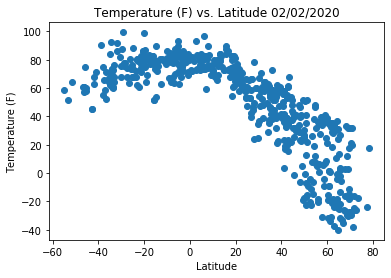

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a Scatter Plot for latitude vs temperature
x_values = weather_data['Latitude']
y_values = weather_data['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(('Temperature (F) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.show()
plt.savefig('temperature_latitude')

#### Latitude vs. Humidity Plot

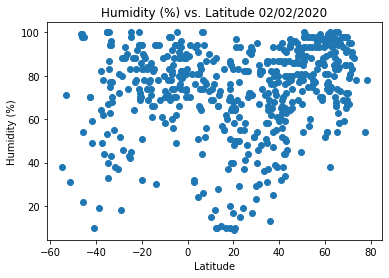

<Figure size 432x288 with 0 Axes>

In [19]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_data['Latitude']
y_values1 = weather_data['Humidity']
plt.scatter(x_values,y_values1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(('Humidity (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.show()
plt.savefig('humidity_latitude')

#### Latitude vs. Cloudiness Plot

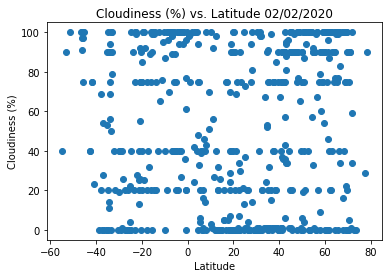

<Figure size 432x288 with 0 Axes>

In [20]:
# Create a Scatter Plot for latitude vs cloudiness
x_values = weather_data['Latitude']
y_values2 = weather_data['Cloudiness']
plt.scatter(x_values,y_values2)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(('Cloudiness (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.show()
plt.savefig('cloudiness_latitude')

#### Latitude vs. Wind Speed Plot

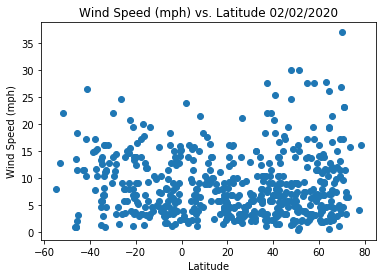

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a Scatter Plot for latitude vs wind speed
x_values = weather_data['Latitude']
y_values3 = weather_data['Wind Speed']
plt.scatter(x_values,y_values3)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(('Wind Speed (mph) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.show()
plt.savefig('wind speed_latitude')

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [22]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern Hemisphere DataFrame
northern_df = weather_data.loc[weather_data['Latitude'] > 0 ]
northern_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
0,makat,47.65,53.35,28.76,92,0,8.50,28.76
1,kapaa,22.08,-159.32,70.39,83,1,6.93,71.60
3,nantucket,41.28,-70.10,39.11,69,90,6.93,39.99
4,abu samrah,35.30,37.18,45.01,64,0,5.97,45.01
7,tottori,35.50,134.23,41.74,78,32,9.44,41.74


In [23]:
southern_df = weather_data.loc[weather_data['Latitude'] < 0 ]
southern_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
2,castro,-24.79,-50.01,67.51,98,100,3.49,67.51
5,hobart,-42.88,147.33,45.05,70,40,11.41,48.20
6,bluff,-46.60,168.33,61.00,99,100,1.01,61.00
9,cape town,-33.93,18.42,69.49,94,75,16.11,71.01
13,rikitea,-23.12,-134.97,79.77,77,100,14.70,79.77


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.705


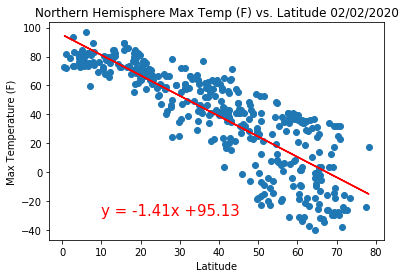

<Figure size 432x288 with 0 Axes>

In [24]:
#x & y
north_lat = northern_df['Latitude']
north_max_temp = northern_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_max_temp)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat,north_max_temp)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(('Northern Hemisphere Max Temp (F) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('north_maxtemp_latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.217


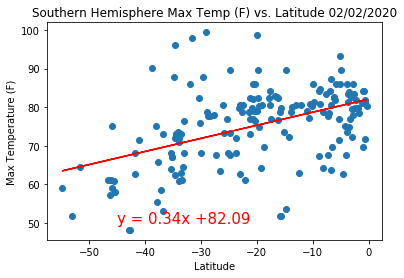

<Figure size 432x288 with 0 Axes>

In [25]:
#x & y
south_lat = southern_df['Latitude']
south_max_temp = southern_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_max_temp)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat,south_max_temp)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(('Southern Hemisphere Max Temp (F) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(-45,50),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('south_maxtemp_latitude')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.141


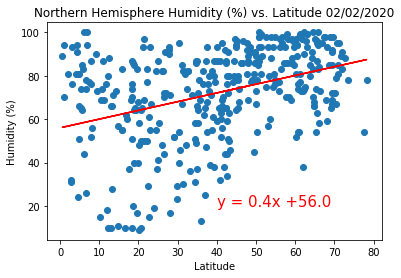

<Figure size 432x288 with 0 Axes>

In [26]:
#x & y
north_humid = northern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat,north_humid)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(('Northern Hemisphere Humidity (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('north_humidity_latitude')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.062


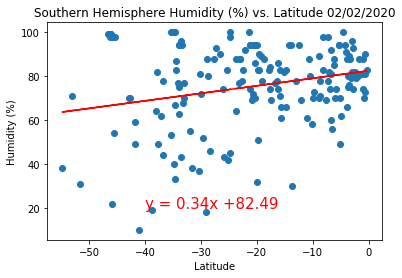

<Figure size 432x288 with 0 Axes>

In [27]:
#x & y
south_humid = southern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat,south_humid)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(('Southern Hemisphere Humidity (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('south_humidity_latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.076


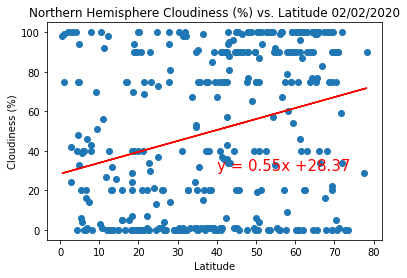

<Figure size 432x288 with 0 Axes>

In [28]:
#x & y
north_cloud = northern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat,north_cloud)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(('Northern Hemisphere Cloudiness (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('north_cloud_latitude')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.038


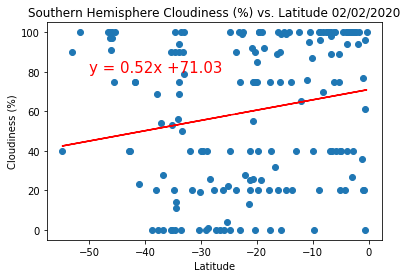

<Figure size 432x288 with 0 Axes>

In [29]:
#x & y
south_cloud = southern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat,south_cloud)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(('Southern Hemisphere Cloudiness (%) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('south_cloud_latitude')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014


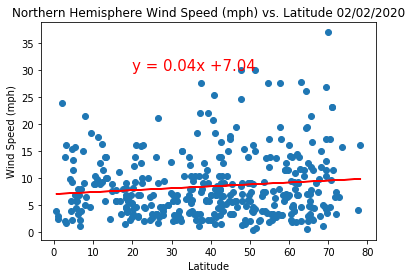

<Figure size 432x288 with 0 Axes>

In [30]:
#x & y
north_wind = northern_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)

# Get regression values
regress_values = north_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(north_lat,north_wind)
plt.plot(north_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(('Northern Hemisphere Wind Speed (mph) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('north_wind_latitude')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.036


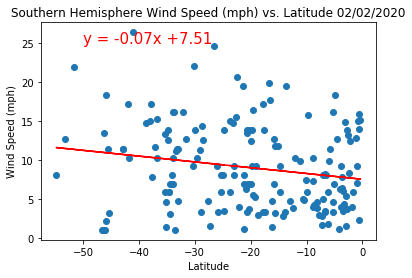

<Figure size 432x288 with 0 Axes>

In [31]:
#x & y
south_wind = southern_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)

# Get regression values
regress_values = south_lat * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(south_lat,south_wind)
plt.plot(south_lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(('Southern Hemisphere Wind Speed (mph) vs. Latitude') + " " + pd.datetime.now().strftime("%m/%d/%Y"))
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print r square value
rvalue2 = round(rvalue * rvalue,3)
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()
plt.savefig('south_wind_latitude')